In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sympy import *

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 12})

In [2]:
theta = np.array([np.pi/6, -np.pi/9, -np.pi/20], dtype=np.float32)
theta_deg = theta * 180 / np.pi
print('rotation angle (degree):', theta_deg)

scale_factor = [3, 1, .5] # scale for x, y ,z
Sigma = np.diag(scale_factor)
Sigma = Sigma.astype(np.float32)
print('scale fator', scale_factor)

# # rotation on x axis
Rx = np.array([
    [1, 0, 0],
    [0, np.cos(theta[0]), -np.sin(theta[0])],
    [0, np.sin(theta[0]), np.cos(theta[0])]
], dtype=np.float32)

Ry = np.array([
    [np.cos(theta[1]), 0, np.sin(theta[1])],
    [0, 1, 0],
    [-np.sin(theta[1]), 0, np.cos(theta[1])]
], dtype=np.float32)

Rz = np.array([
    [np.cos(theta[2]), np.sin(theta[2]), 0],
    [-np.sin(theta[2]), np.cos(theta[2]), 0],
    [0, 0, 1],
], dtype=np.float32)

rotation angle (degree): [ 30. -20.  -9.]
scale fator [3, 1, 0.5]


In [3]:
# scale and then rotate. In reverse order
X = Rz @ Ry @ Rx @ Sigma
# X = Rx @ Sigma

In [4]:
# U capatures the rotation and V capatures the stretch
U, s, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(s)
X = U @ S

x (100, 100)


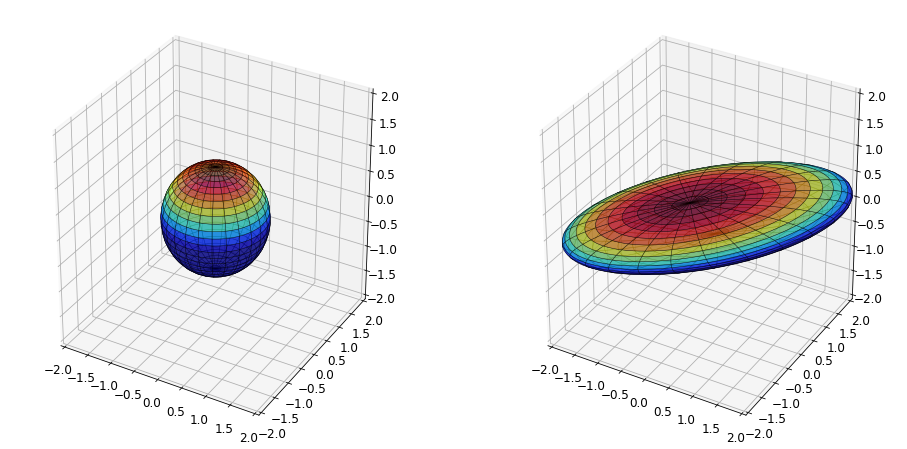

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
u = np.linspace(-np.pi, np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
print('x',x.shape)

# plot surface
surf1 = ax1.plot_surface(
    x, y, z, 
    cmap='jet', alpha=0.6,
    facecolors=plt.cm.jet(z),
    linewidth=0.5,
    rcount=30, ccount=30
)
surf1.set_edgecolor('k')
ax1.set_xlim3d(-2, 2)
ax1.set_ylim3d(-2, 2)
ax1.set_zlim3d(-2, 2)

xR = np.zeros_like(x)
yR = np.zeros_like(y)
zR = np.zeros_like(z)

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        vec = [x[i,j], y[i,j], z[i,j]]
        vecR = X @ vec
        xR[i,j] = vecR[0]
        yR[i,j] = vecR[1]
        zR[i,j] = vecR[2]

ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(xR, yR, zR, 
    cmap='jet', alpha=0.6,
    facecolors=plt.cm.jet(z),
    linewidth=0.5,
    rcount=30, ccount=30)
surf2.set_edgecolor('k')
ax2.set_xlim3d(-2, 2)
ax2.set_ylim3d(-2, 2)
ax2.set_zlim3d(-2, 2)

plt.show()

In [6]:
Matrix(np.round(VT))

Matrix([
[-1.0,  0.0, 0.0],
[ 0.0, -1.0, 0.0],
[ 0.0,  0.0, 1.0]])

In [7]:
Matrix(S)

Matrix([
[3.0, 0.0, 0.0],
[0.0, 1.0, 0.0],
[0.0, 0.0, 0.5]])

In [8]:
Matrix(np.round(U*1e5)/1.e5)

Matrix([
[-0.92812,  0.30438, -0.21433],
[  -0.147, -0.82861, -0.54018],
[-0.34202, -0.46985,   0.8138]])

In [9]:
Matrix(Rz @ Ry @ Rx)
# Matrix(Rx)

Matrix([
[0.928123, -0.304381, -0.214334],
[   0.147,  0.828611,  -0.54018],
[ 0.34202,  0.469846,  0.813798]])

In [10]:
Matrix(np.round(U@VT*1e5)/1.e5)

Matrix([
[0.92812, -0.30438, -0.21433],
[  0.147,  0.82861, -0.54018],
[0.34202,  0.46985,   0.8138]])